# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

## Data Overview

- Observations
- Sanity checks

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/DSBA/Logistic Regression/INNHotelsGroup.csv')

Mounted at /content/drive


In [3]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [4]:
df.shape

(36275, 19)

In [5]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

Of the 19 columns in the dataset, 14 of them have numerical values

In [6]:
df.isnull().values.any()

False

We don't have any missing values in the data 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
pd.DataFrame({'Count':df.isnull().sum()[df.isnull().sum()>0],'Percentage':(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0])*100})

Empty DataFrame
Columns: [Count, Percentage]
Index: []

The dataset has no missing values hence no treatment is required

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

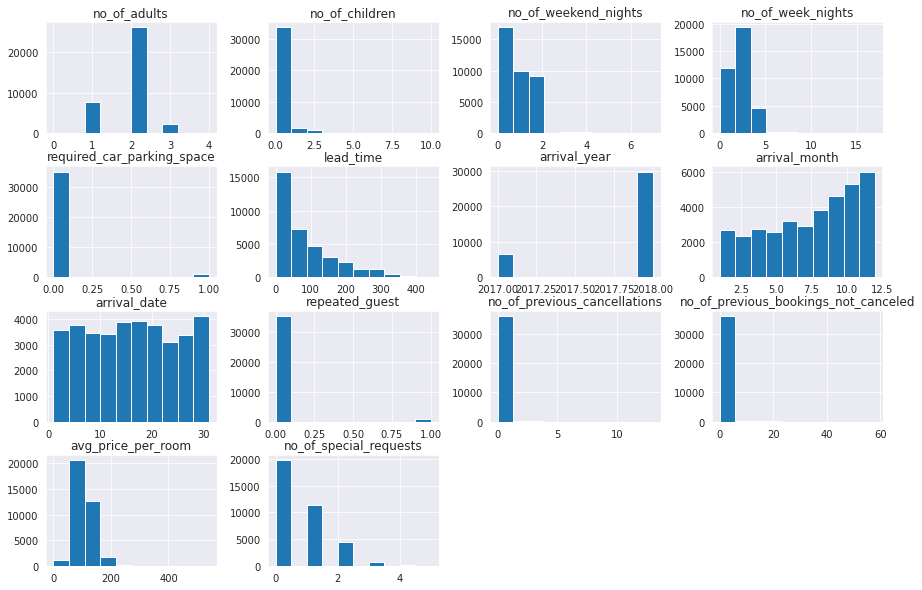

In [9]:
sns.set_style("darkgrid")
df.hist(figsize=(15, 10))
plt.xticks(rotation = 90)
plt.show()




*   The data only represents bookings made between 2017 and 2018
*   We can see that there is a good distribuiton of arrival dates across a given month 
*   The hotel has a very low amount of repeated guests, this could be something to do with their overall service. This could also translate to the null amount of previous cancellations






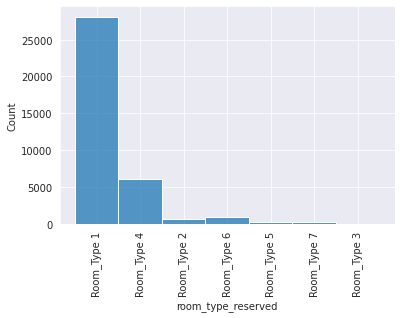

In [10]:
sns.histplot(data=df, x="room_type_reserved")
plt.xticks(rotation = 90)
plt.show()

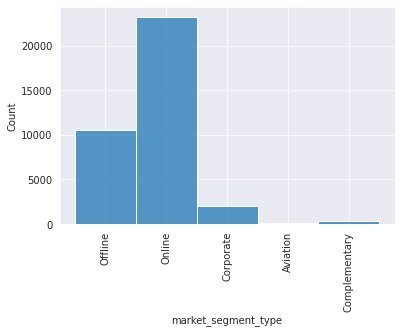

In [11]:
sns.histplot(data=df, x="market_segment_type")
plt.xticks(rotation = 90)
plt.show()

The market segment with the highest amount of bookings is the Online segment

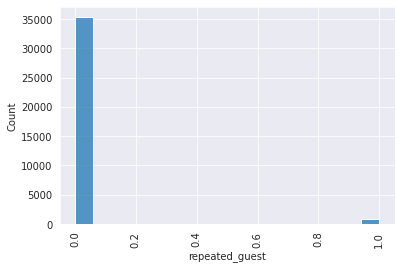

In [12]:
sns.histplot(data=df, x="repeated_guest")
plt.xticks(rotation = 90)
plt.show()

We can also see that the hotel has a very low amount of repeated guests

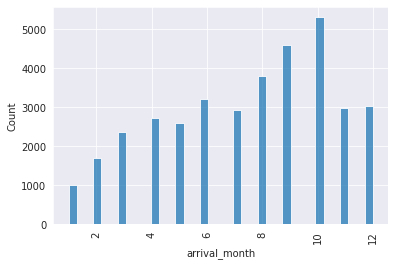

In [13]:
sns.histplot(data=df, x="arrival_month")
plt.xticks(rotation = 90)
plt.show()

The top 3 busiest months in the hotel are October, September and August in that order

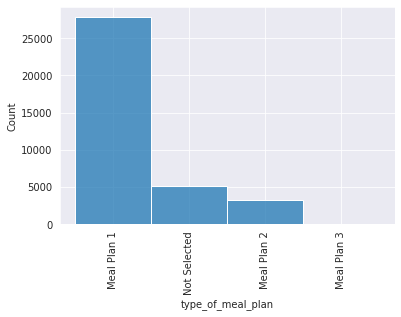

In [14]:
sns.histplot(data=df, x="type_of_meal_plan")
plt.xticks(rotation = 90)
plt.show()

In [16]:
df_avg_price_segment = df.groupby(['market_segment_type'])['avg_price_per_room'].mean()
df_avg_price_segment

market_segment_type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.632679
Online           112.256855
Name: avg_price_per_room, dtype: float64

We notice can observe that on average, the average price per room is highest for the online market segment and lowesg on the complementary segment

In [20]:
df['booking_status'].value_counts(normalize=True)*100

Not_Canceled    67.236389
Canceled        32.763611
Name: booking_status, dtype: float64

32% of the bookings are canceled according to the dataset provided

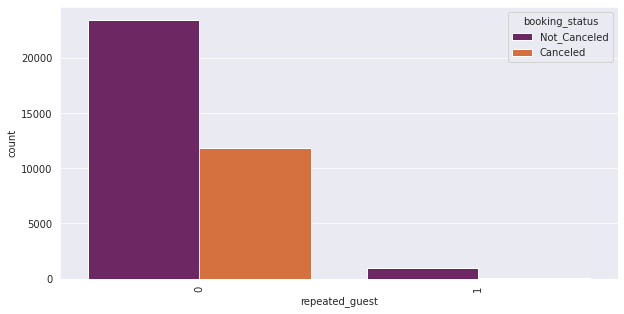

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='repeated_guest', hue='booking_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

In [29]:
df_repeat_cancellation = df.groupby(['repeated_guest'])['booking_status'].value_counts(normalize=True)*100
df_repeat_cancellation

repeated_guest  booking_status
0               Not_Canceled      66.419578
                Canceled          33.580422
1               Not_Canceled      98.279570
                Canceled           1.720430
Name: booking_status, dtype: float64

Only 1.7% of the repeating guests cancel their bookings

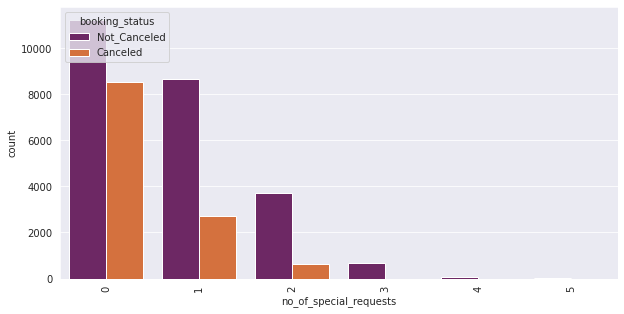

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status', palette='inferno')
plt.xticks(rotation=90)
plt.show()

In [31]:
df_special_requests_cancellation = df.groupby(['no_of_special_requests'])['booking_status'].value_counts(normalize=True)*100
df_special_requests_cancellation

no_of_special_requests  booking_status
0                       Not_Canceled       56.793245
                        Canceled           43.206755
1                       Not_Canceled       76.233184
                        Canceled           23.766816
2                       Not_Canceled       85.403300
                        Canceled           14.596700
3                       Not_Canceled      100.000000
4                       Not_Canceled      100.000000
5                       Not_Canceled      100.000000
Name: booking_status, dtype: float64

We can see that the number of special requests does not really have an effect on the booking status

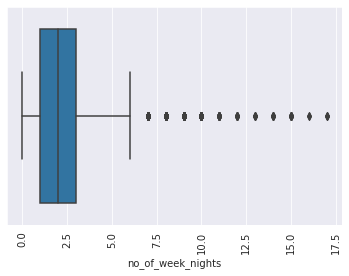

In [33]:
sns.boxplot(data=df, x="no_of_week_nights")
plt.xticks(rotation = 90)
plt.show()

We observe some outliers in the number of week nights where the expected maximum is 5. This could be attributed to extended stays past the weekend. A similar observation could be met under the number of weekend nights as well

In [34]:
df['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

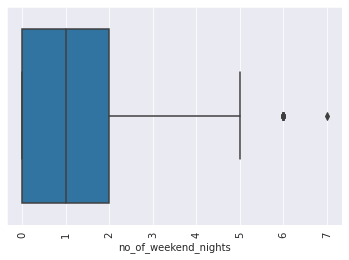

In [35]:
sns.boxplot(data=df, x="no_of_weekend_nights")
plt.xticks(rotation = 90)
plt.show()

In [36]:
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

Similar to the variable 'no of week nights', some outliers exist which could be due to extended says, we may consider a way to treat these outliers or categorise accordingly

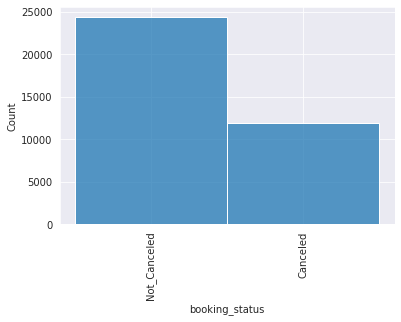

In [37]:
sns.histplot(data=df, x="booking_status")
plt.xticks(rotation = 90)
plt.show()

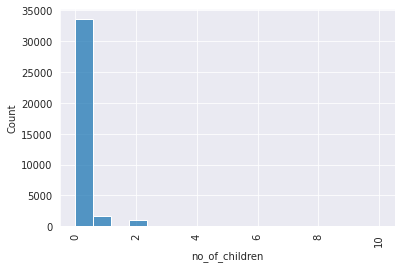

In [38]:
sns.histplot(data=df, x="no_of_children")
plt.xticks(rotation = 90)
plt.show()

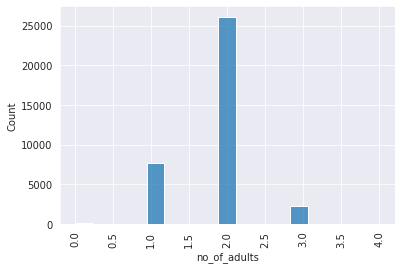

In [39]:
sns.histplot(data=df, x="no_of_adults")
plt.xticks(rotation = 90)
plt.show()

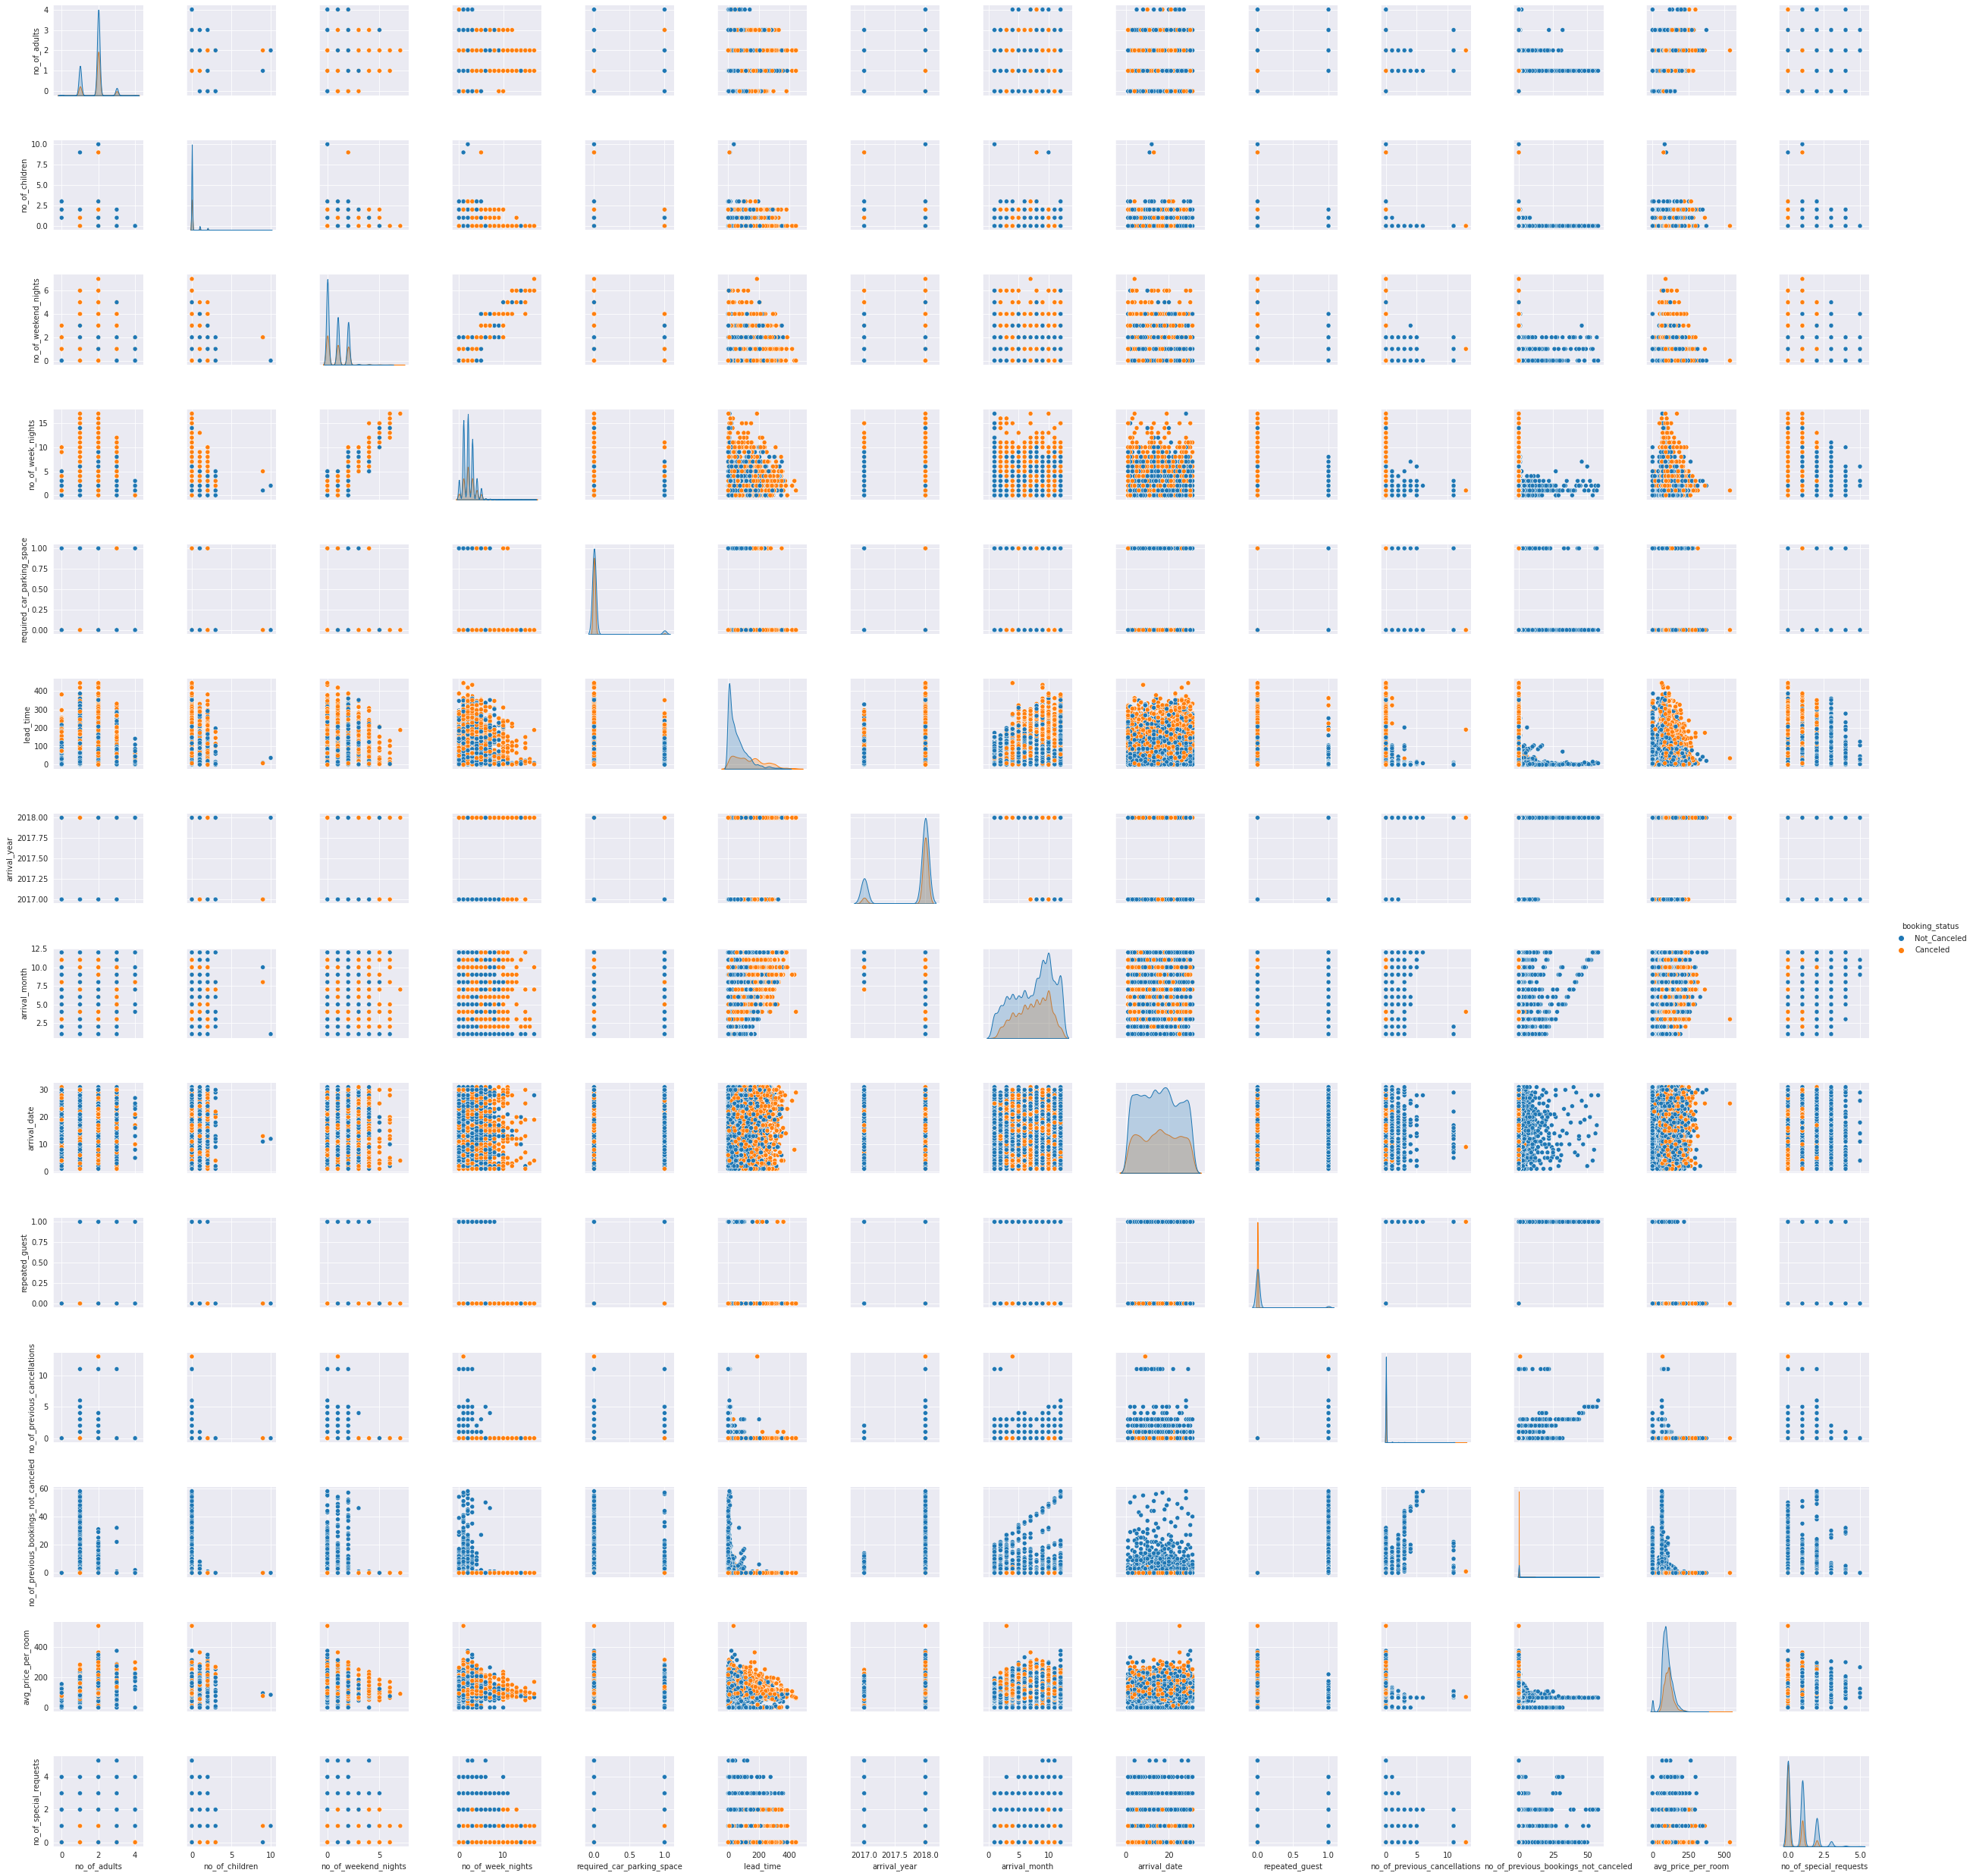

In [41]:
sns.pairplot(df, hue="booking_status")
plt.show()

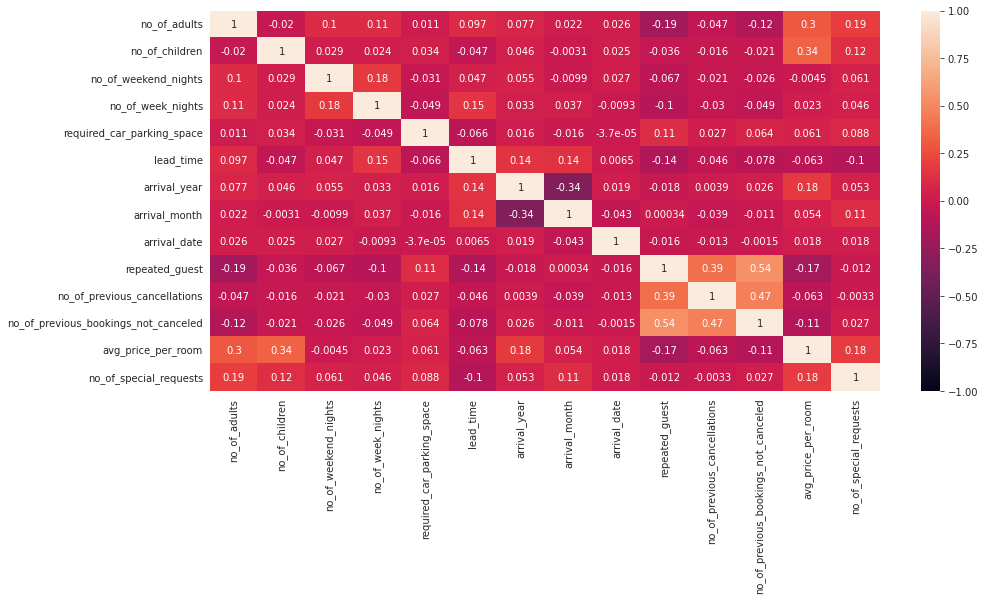

In [40]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

No significant cases of high correlation amongst the variables observed

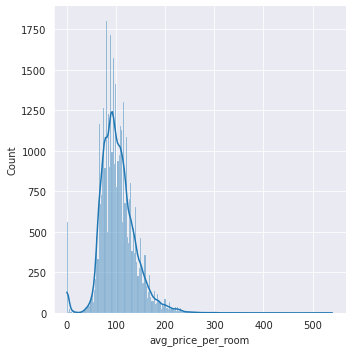

In [43]:
sns.displot(data=df, x='avg_price_per_room',kde=True)

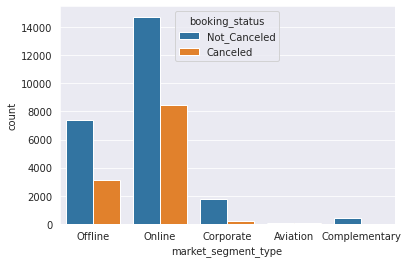

In [42]:
sns.countplot(data=df, x='market_segment_type', hue='booking_status');

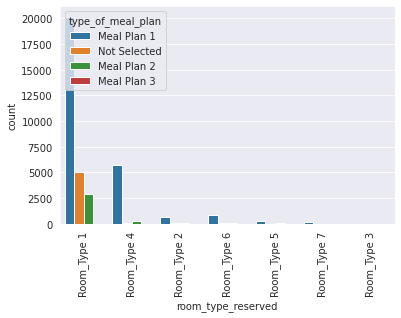

In [44]:
sns.countplot(data=df, x='room_type_reserved', hue='type_of_meal_plan');
plt.xticks(rotation = 90)
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

There are no missing values to treat hence we can move on to outlier detection and treatment

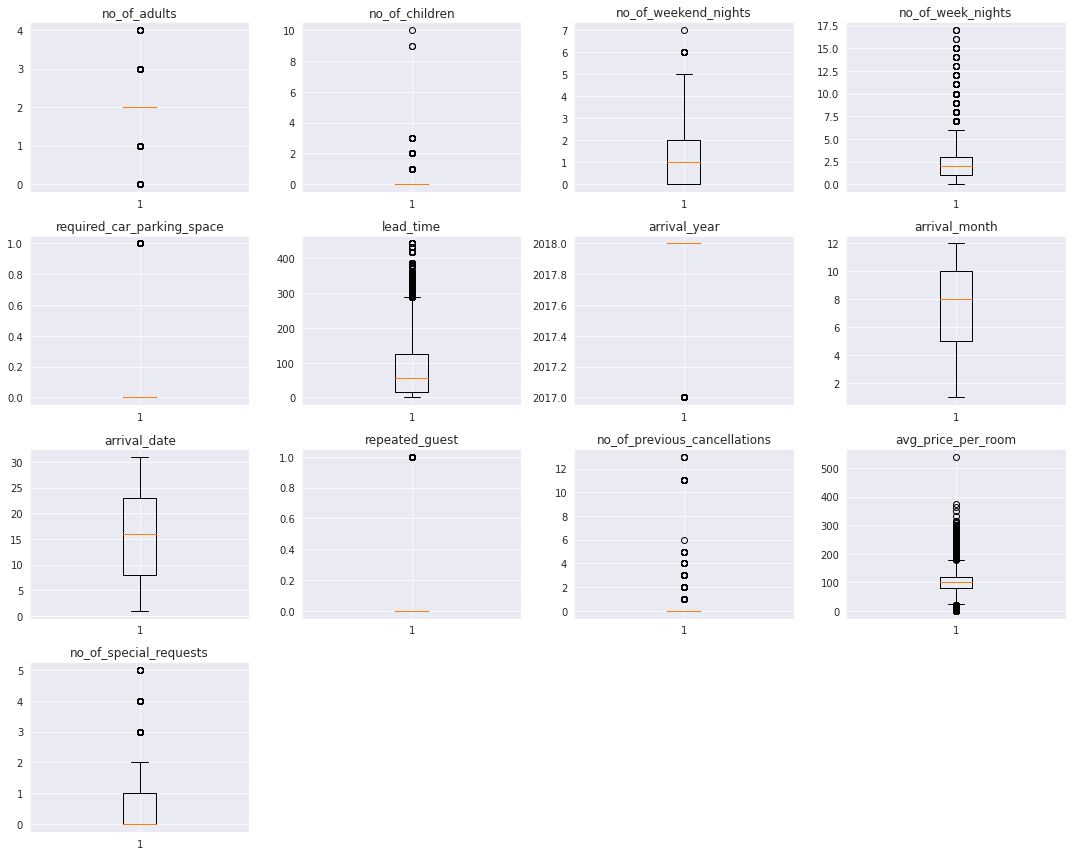

In [45]:
# outlier detection using boxplot
# selecting the numerical columns of data and adding their names in a list 
numeric_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time','arrival_year',
                   'arrival_month', 'arrival_date', 'repeated_guest','no_of_previous_cancellations','avg_price_per_room','no_of_special_requests']
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We will treat the outliers in lead time as well as avg room price in line with the inter-quartile ranges

In [46]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

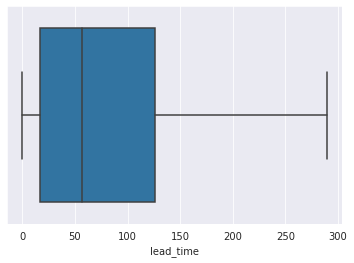

In [47]:
df = treat_outliers(df,'lead_time')

# visualizing the column after outlier treatment
sns.boxplot(data=df,x='lead_time')
plt.show()

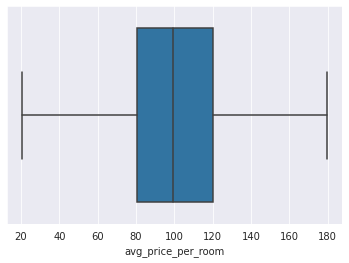

In [48]:
df = treat_outliers(df,'avg_price_per_room')

# visualizing the column after outlier treatment
sns.boxplot(data=df,x='avg_price_per_room')
plt.show()

In [49]:
df['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [50]:
df['booking_status'] = df["booking_status"].apply(lambda x: 0 if x =='Not_Canceled' else 1)

We use this to convert the booking status variable to 1 and 0 for easier manipulation and regression

In [51]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1      224.0          2017             10             2   
1        Room_Type 1        5.0          2018             11             6   
2        Room_Type 1        1.0          2018              2            28   
3        Room_Type 1      211.0          2018              5            20   
4        Room_Type 1       48.0          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

## EDA

- It is a good idea to explore the data once again after manipulating it.

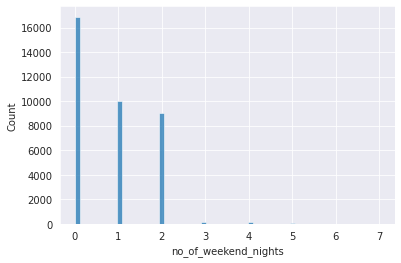

In [52]:
sns.histplot(data=df, x="no_of_weekend_nights")

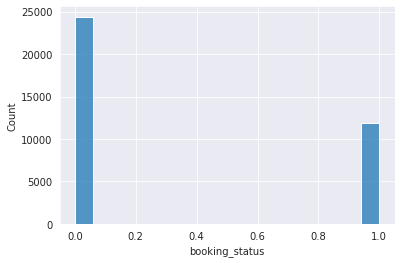

In [53]:
sns.histplot(data=df, x="booking_status")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  float64
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  float64
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [42]:
#numcat = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
#'no_of_week_nights', 'required_car_parking_space',
#'arrival_year', 'arrival_month',
#'arrival_date', 'repeated_guest',
#'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
#'no_of_special_requests','booking_status', 'lead_time','avg_price_per_room']

#for feature in numcat:
 # if df[feature].dtype == 'int64':
 #   df[feature] = pd.Categorical(df[feature])


In [57]:
df_tree = df.copy()
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  float64
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Building a Logistic Regression model

First we need to split the data into the training and testing set

In [58]:
X = df.drop(['booking_status','Booking_ID','arrival_year', 'room_type_reserved', 'lead_time','avg_price_per_room'], axis=1)
Y = df['booking_status']
#'arrival_year', 'room_type_reserved', 'lead_time','avg_price_per_room'
X = add_constant(X)

In [59]:
X = pd.get_dummies(X, drop_first=True)
#['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','required_car_parking_space','room_type_reserved','lead_time','arrival_year','arrival_month','arrival_date','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   arrival_month                         36275 non-null  int64  
 7   arrival_date                          36275 non-null  int64  
 8   repeated_guest                        36275 non-null  int64  
 9   no_of_previous_cancellations          36275 non-null  int64  
 10  no_of_previous_bookings_not_canceled  36275 non-null  int64  
 11  no_of_special_r

In [61]:
logit1 = sm.Logit(y_train, X_train.astype(float))
lg_1 = logit1.fit()
print(lg_1.summary())

         Current function value: 0.542372
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1425
Time:                        20:27:51   Log-Likelihood:                -13772.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.8119      0.264     -6.863      0.000      -2.329

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Checking model performance

In [62]:
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg_1.predict(X_train) > 0.5
pred_train = np.round(pred_train)

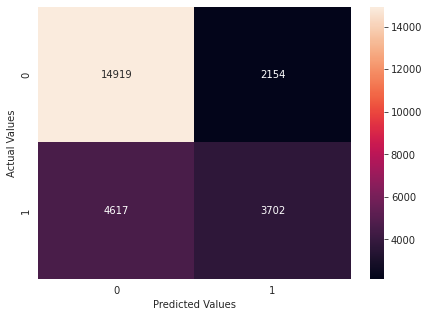

In [63]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### The confusion matrix

* True Positives (TP):  A booking which has been predicted as not cancelled and was not cancelled
* True Negatives (TN): A booking which has been predicted to be cancelled and has been canclled
* False Positives (FP): A booking that has been predicted as not cancelled and it has been cancelled
* False Negatives (FN): A booking that has been predicted as cancelled and it has not been cancelled

In [64]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

Accuracy on training set :  0.7333412098298677


The model seems to be performing well on the training set. The next step will be to make interpretations after checking and removing multicollinearity

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [65]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                   310.508767
no_of_adults                              1.178106
no_of_children                            1.055619
no_of_weekend_nights                      1.058260
no_of_week_nights                         1.070157
required_car_parking_space                1.030740
arrival_month                             1.024585
arrival_date                              1.006838
repeated_guest                            1.739486
no_of_previous_cancellations              1.320757
no_of_previous_bookings_not_canceled      1.565244
no_of_special_requests                    1.233682
type_of_meal_plan_Meal Plan 2             1.109667
type_of_meal_plan_Meal Plan 3             1.005673
type_of_meal_plan_Not Selected            1.122882
market_segment_type_Complementary         4.124919
market_segment_type_Corporate            16.477875
market_segment_type_Offline              61.454779
market_segment_type_Online               68.896365
dtype: float64



We observe 4 variables with high VIF values, mostly around the market segment variables. We will drop these and observe the effects

In [66]:
X_train1 = X_train.drop(['market_segment_type_Offline'], axis=1)
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg_2 = logit2.fit()
pred_train1 = lg_2.predict(X_train1)
pred_train1 = np.round(pred_train1)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train1))

         Current function value: 0.542375
         Iterations: 35
Accuracy on training set :  0.7333412098298677


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


We notice there is no change in the accuracy, we can now re-check the VIF values

In [67]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                                   28.031332
no_of_adults                             1.168614
no_of_children                           1.055529
no_of_weekend_nights                     1.057429
no_of_week_nights                        1.069503
required_car_parking_space               1.030466
arrival_month                            1.024569
arrival_date                             1.006780
repeated_guest                           1.736274
no_of_previous_cancellations             1.320655
no_of_previous_bookings_not_canceled     1.564940
no_of_special_requests                   1.233610
type_of_meal_plan_Meal Plan 2            1.107767
type_of_meal_plan_Meal Plan 3            1.005672
type_of_meal_plan_Not Selected           1.122818
market_segment_type_Complementary        1.107632
market_segment_type_Corporate            1.471350
market_segment_type_Online               1.580252
dtype: float64



We now have all our VIF values in an acceptable range (VIF<5) hence we have removed multicollinearity

In [68]:
print(lg_2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1425
Time:                        20:35:01   Log-Likelihood:                -13772.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9192      0.078    -24.530      0.000      -2.073      -1.766
no_of_adults                             0.3459      

However, we still have some variables with high p-values (Arrival_date, Type_of_meal_plan plan 3 and Market_Segment_type_Complementary). We will proceed to drop these and explore their effects

In [69]:
X_train2 = X_train1.drop(['type_of_meal_plan_Meal Plan 3'], axis=1)
logit3 = sm.Logit(y_train, X_train2.astype(float))
lg_3 = logit3.fit()
pred_train2 = lg_3.predict(X_train2)
pred_train2 = np.round(pred_train2)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train2))

         Current function value: 0.542424
         Iterations: 35
Accuracy on training set :  0.733301827347196


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
print(lg_3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25375
Method:                           MLE   Df Model:                           16
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1424
Time:                        20:35:24   Log-Likelihood:                -13773.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9190      0.078    -24.529      0.000      -2.072      -1.766
no_of_adults                             0.3460      

Still no change in the model performance, p-value for the market segment complementary has gone up

In [71]:
X_train3 = X_train2.drop(['market_segment_type_Complementary'], axis=1)
logit4 = sm.Logit(y_train, X_train3.astype(float))
lg_4 = logit4.fit()
pred_train3 = lg_4.predict(X_train3)
pred_train3 = np.round(pred_train3)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train3))

Optimization terminated successfully.
         Current function value: 0.543839
         Iterations 14
Accuracy on training set :  0.7325141776937618


In [72]:
print(lg_4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1402
Time:                        20:35:45   Log-Likelihood:                -13809.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9607      0.078    -25.128      0.000      -2.114      -1.808
no_of_adults                             0.3542      

Slight decrease of about 0.1% in the accuracy We proceed to drop the last variable

In [73]:
X_train4 = X_train3.drop(['arrival_date'], axis=1)
logit5 = sm.Logit(y_train, X_train4.astype(float))
lg_5 = logit5.fit()
pred_train4 = lg_5.predict(X_train4)
pred_train4 = np.round(pred_train4)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Optimization terminated successfully.
         Current function value: 0.543884
         Iterations 14
Accuracy on training set :  0.7315689981096408


In [74]:
print(lg_5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1401
Time:                        20:35:57   Log-Likelihood:                -13810.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9226      0.074    -26.060      0.000      -2.067      -1.778
no_of_adults                             0.3557      

The final accuracy of the model stands at 73.2% with no high p-values.

# Coefficient interpretations

*   Not all coefficients are positive so an increase in them could reduce the chances of a booking not being cancelled




###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [75]:
# converting coefficients to odds
odds = np.exp(lg_5.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train4.columns, columns=["odds"]).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
odds  0.146233      1.427147        1.232162              1.113849   

      no_of_week_nights  required_car_parking_space  arrival_month  \
odds           1.120504                    0.272744       1.016276   

      repeated_guest  no_of_previous_cancellations  \
odds        0.096177                      1.479997   

      no_of_previous_bookings_not_canceled  no_of_special_requests  \
odds                              0.246809                0.284149   

      type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
odds                        2.31941                        0.800445   

      market_segment_type_Corporate  market_segment_type_Online  
odds                        0.62812                    3.046969

In [76]:
# finding the percentage change
perc_change_odds = (np.exp(lg_5.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train4.columns, columns=["change_odds%"]).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
change_odds% -85.376661     42.714659       23.216175             11.384899   

              no_of_week_nights  required_car_parking_space  arrival_month  \
change_odds%          12.050377                  -72.725583       1.627603   

              repeated_guest  no_of_previous_cancellations  \
change_odds%      -90.382299                     47.999708   

              no_of_previous_bookings_not_canceled  no_of_special_requests  \
change_odds%                            -75.319054              -71.585091   

              type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Not Selected  \
change_odds%                     131.940994                       -19.95549   

              market_segment_type_Corporate  market_segment_type_Online  
change_odds%                     -37.188042                  204.696864

## Model performance evaluation

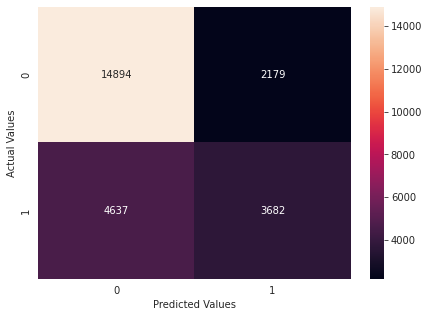

In [77]:
cm = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [78]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Accuracy on training set :  0.7315689981096408


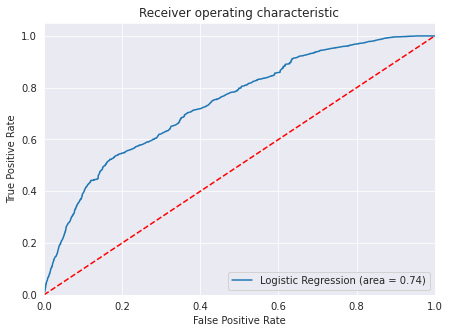

In [79]:
logit_roc_auc_train = roc_auc_score(y_train, lg_5.predict(X_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg_5.predict(X_train4))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Model is performing well on the training set

## We can now use the model to make predictions on the test data

In [80]:
X_test.head()

const  no_of_adults  no_of_children  no_of_weekend_nights  \
22801    1.0             2               0                     0   
3830     1.0             2               0                     0   
33959    1.0             2               0                     1   
14068    1.0             3               0                     0   
10215    1.0             3               0                     2   

       no_of_week_nights  required_car_parking_space  arrival_month  \
22801                  1                           0              8   
3830                   3                           0             11   
33959                  3                           0              9   
14068                  2                           0              6   
10215                  1                           0              2   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
22801            25               0                             0   
3830             10               0                             0   
33959            14               0                             0   
14068             1               0                             0   
10215             6               0                             0   

       no_of_previous_bookings_not_canceled  no_of_special_requests  \
22801                                     0                       0   
3830                                      0                       2   
33959                                     0                       2   
14068                                     0                       0   
10215                                     0                       2   

       type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
22801                              0                              0   
3830                               0                              0   
33959                              0                              0   
14068                              0                              0   
10215                              0                              0   

       type_of_meal_plan_Not Selected  market_segment_type_Complementary  \
22801                               1                                  0   
3830                                0                                  0   
33959                               0                                  0   
14068                               0                                  0   
10215                               0                                  0   

       market_segment_type_Corporate  market_segment_type_Offline  \
22801                              0                            0   
3830                               0                            0   
33959                              0                            0   
14068                              0                            0   
10215                              0                            0   

       market_segment_type_Online  
22801                           1  
3830                            1  
33959                           1  
14068                           1  
10215                           1

In [81]:
X_test = X_test.drop(["arrival_date", "type_of_meal_plan_Meal Plan 3", "market_segment_type_Complementary", "market_segment_type_Offline"], axis=1)

In [82]:
pred_test = lg_5.predict(X_test) > 0.5
pred_test = np.round(pred_test)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.7315689981096408
Accuracy on test set :  0.7277405127262704


The difference between the accuracy of the training and test sets are within margin, the model performance is good.

## Final Model Summary

In [83]:
print(lg_5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Fri, 17 Feb 2023   Pseudo R-squ.:                  0.1401
Time:                        20:42:19   Log-Likelihood:                -13810.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.9226      0.074    -26.060      0.000      -2.067      -1.778
no_of_adults                             0.3557      

## Building a Decision Tree model

In [84]:
df_tree.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1      224.0          2017             10             2   
1        Room_Type 1        5.0          2018             11             6   
2        Room_Type 1        1.0          2018              2            28   
3        Room_Type 1      211.0          2018              5            20   
4        Room_Type 1       48.0          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

In [85]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  float64
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

We first start by converting all the object variables to categorical ones.

In [86]:
for feature in df_tree.columns: # Loop through all columns in the dataframe
    if df_tree[feature].dtype == 'object': # Only apply for columns with categorical strings
        df_tree[feature] = pd.Categorical(df_tree[feature])# Replace strings with an integer
df_tree.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1      224.0          2017             10             2   
1        Room_Type 1        5.0          2018             11             6   
2        Room_Type 1        1.0          2018              2            28   
3        Room_Type 1      211.0          2018              5            20   
4        Room_Type 1       48.0          2018              4            11   
5        Room_Type 1      289.5          2018              9            13   
6        Room_Type 1       34.0          2017             10            15   
7        Room_Type 4       83.0          2018             12            26   
8        Room_Type 1      121.0          2018              7             6   
9        Room_Type 4       44.0          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2              

In [87]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  float64 
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

We weill proceed to replace the structure around the integer variables into categorical forms

In [88]:
print(df_tree.no_of_adults.value_counts())
print(df_tree.no_of_children.value_counts())
print(df_tree.no_of_weekend_nights.value_counts())
print(df_tree.no_of_week_nights.value_counts())
print(df_tree.required_car_parking_space.value_counts())
print(df_tree.lead_time.value_counts())
print(df_tree.arrival_year.value_counts())
print(df_tree.arrival_month.value_counts())
print(df_tree.arrival_date.value_counts())
print(df_tree.repeated_guest.value_counts())
print(df_tree.no_of_previous_cancellations.value_counts())
print(df_tree.no_of_previous_bookings_not_canceled.value_counts())
print(df_tree.avg_price_per_room.value_counts())
print(df_tree.no_of_special_requests.value_counts())

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
289.5    1331
0.0      1297
1.0      1078
2.0       643
3.0       630
         ... 
234.0       7
288.0       5
272.0       4
284.0       3
264.0       2
Name: lead_time, Length: 291, dtype: int64
2018    29761
2017     6514
Name: arrival_year, dtype: int64
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2

In [89]:
replaceStruct = {
                "no_of_children":     {"0 - 2": 1, "3 - 10": 2},
                "no_of_week_nights": {"0 - 5": 1, "6 - 10": 2 , "11 - 16": 3},
                 "no_of_weekend_nights": {"0 - 2": 1, "3 - 7": 2},
                 "lead_time":     {"0 - 99": 1, "100 - 199": 2 , " > 200": 3},
                 "avg_price_per_room":     {"0 - 79": 1, "80 - 119": 2 , "120 - 139": 3, " > 140": 4},
                "arrival_date":     {"1 - 10": 1, "11 - 20": 2 , "21 - 31": 3},
                "arrival_month":     {"1 - 5": 1, "6 - 6": 2 , "8 - 12": 3},
                "no_of_previous_cancellations":     {"0": 1, "1 - 4": 2 , "5 - 11": 3},
                 "no_of_previous_bookings_not_canceled":     {"0": 1, "1 - 29": 2 , "30 - 58": 3},
                 "no_of_special_requests":     {"0 - 2": 1, "3 - 5": 2},
                    }
oneHotCols=["no_of_adults","arrival_year","required_car_parking_space","repeated_guest","type_of_meal_plan","room_type_reserved","market_segment_type"]

This allows us to categorise some variables in ranges as well as create dummy variables using the OneHotCols function

In [90]:
df_tree=df_tree.replace(replaceStruct)
df_tree=pd.get_dummies(df_tree, columns=oneHotCols)
df_tree.head(10)

Booking_ID  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0   INN00001               0                     1                  2   
1   INN00002               0                     2                  3   
2   INN00003               0                     2                  1   
3   INN00004               0                     0                  2   
4   INN00005               0                     1                  1   
5   INN00006               0                     0                  2   
6   INN00007               0                     1                  3   
7   INN00008               0                     1                  3   
8   INN00009               0                     0                  4   
9   INN00010               0                     0                  5   

   lead_time  arrival_month  arrival_date  no_of_previous_cancellations  \
0      224.0             10             2                             0   
1        5.0             11             6                             0   
2        1.0              2            28                             0   
3      211.0              5            20                             0   
4       48.0              4            11                             0   
5      289.5              9            13                             0   
6       34.0             10            15                             0   
7       83.0             12            26                             0   
8      121.0              7             6                             0   
9       44.0             10            18                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  ...  \
0                                     0               65.00  ...   
1                                     0              106.68  ...   
2                                     0               60.00  ...   
3                                     0              100.00  ...   
4                                     0               94.50  ...   
5                                     0              115.00  ...   
6                                     0              107.55  ...   
7                                     0              105.61  ...   
8                                     0               96.90  ...   
9                                     0              133.44  ...   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
5                               0                               0   
6                               0                               0   
7                               0                               1   
8                               0                               0   
9                               0                               1   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
5                               0                               0   
6                               0                               0   
7                               0                               0   
8                               0                               0   
9                               0                               0   

   room_type_reserved_Room_Type 7  market_segment_type_Aviation  \
0                               0   

We can observe that this increases the number of columns to 39 after the creation of some more dummy variables

In [91]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 39 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   lead_time                             36275 non-null  float64 
 5   arrival_month                         36275 non-null  int64   
 6   arrival_date                          36275 non-null  int64   
 7   no_of_previous_cancellations          36275 non-null  int64   
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64   
 9   avg_price_per_room                    36275 non-null  float64 
 10  no_of_special_requests                36275 non-null  int64   
 11  bo

In [92]:
X_d = df_tree.drop(["booking_status" ,"Booking_ID"],axis=1)
y_d = df_tree.pop("booking_status")

In [93]:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=.30, random_state=1)

In [94]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train_d, y_train_d)

DecisionTreeClassifier(random_state=1)

In [95]:
print("Accuracy on training set : ",dTree.score(X_train_d, y_train_d))
print("Accuracy on test set : ",dTree.score(X_test_d, y_test_d))

Accuracy on training set :  0.994210775047259
Accuracy on test set :  0.8699807038500413


The accuracy on the training set is set at 0.99 which could be an indication of overfitting as a its close to 100%

In [96]:
#Checking number of positives
y_d.sum(axis = 0)

11885

In [97]:
## Function to create confusion matrix for the decision tree
def make_confusion_matrix_d(model,y_actual_d,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual_d : ground truth  
    
    '''
    y_predict_d = model.predict(X_test_d)
    cm=metrics.confusion_matrix( y_actual_d, y_predict_d, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [98]:
def get_recall_score_d(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train_d = model.predict(X_train_d)
    pred_test_d = model.predict(X_test_d)
    print("Recall on training set : ",metrics.recall_score(y_train_d,pred_train_d))
    print("Recall on test set : ",metrics.recall_score(y_test_d,pred_test_d))

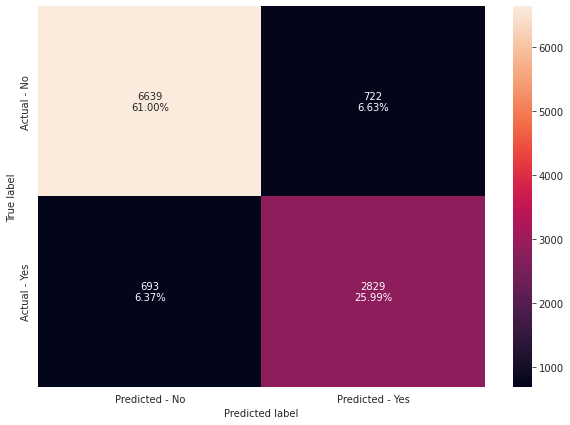

In [99]:
make_confusion_matrix_d(dTree,y_test_d)

In [100]:
get_recall_score_d(dTree)

Recall on training set :  0.9866076766710511
Recall on test set :  0.803236797274276


Visualizing the Decision Tree

In [101]:
feature_names = list(X_d.columns)
print(feature_names)


['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'no_of_adults_0', 'no_of_adults_1', 'no_of_adults_2', 'no_of_adults_3', 'no_of_adults_4', 'arrival_year_2017', 'arrival_year_2018', 'required_car_parking_space_0', 'required_car_parking_space_1', 'repeated_guest_0', 'repeated_guest_1', 'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


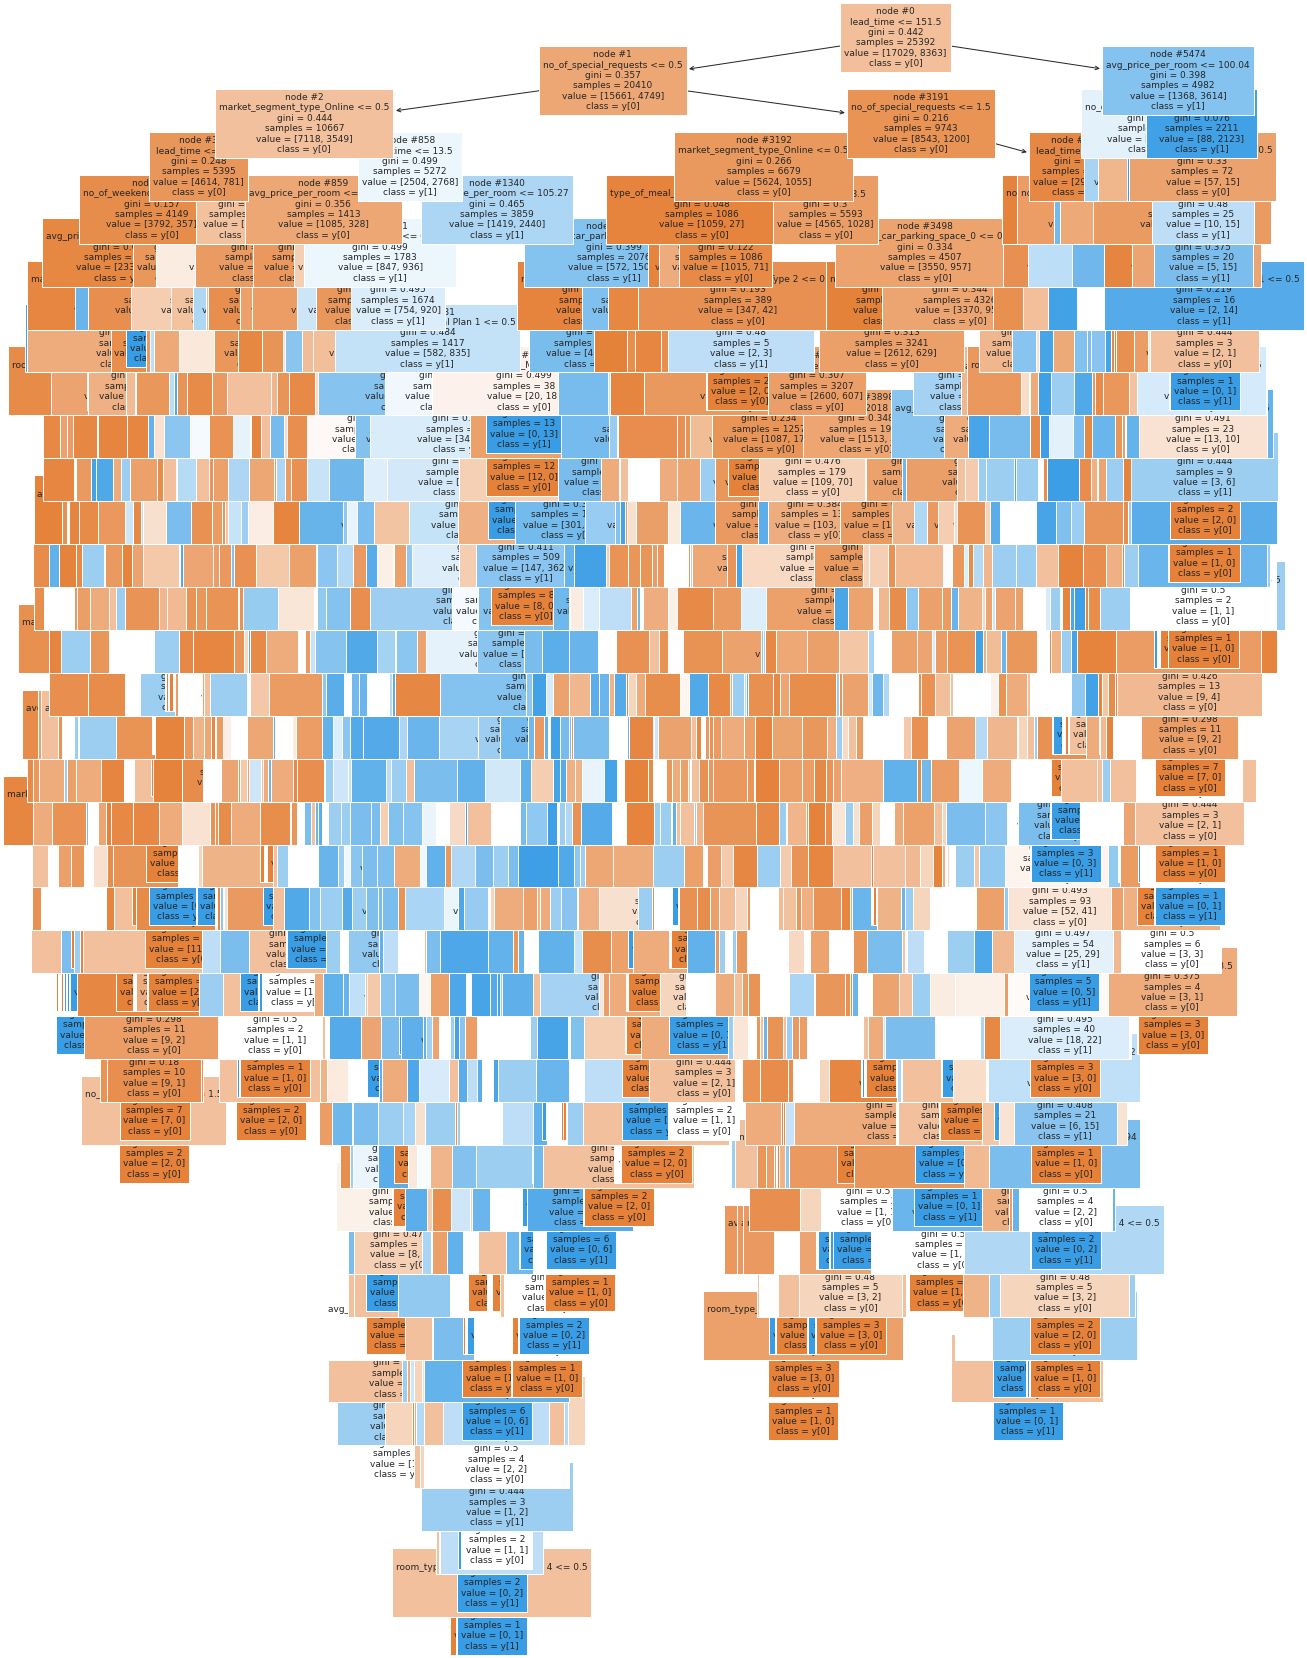

In [102]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

From the level of detail of the decision tree visualised above, it may require pruning. First we will review the importance of the features in the Decision tree

In [103]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train_d.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.351514
avg_price_per_room                    0.166834
arrival_date                          0.086115
market_segment_type_Online            0.080760
no_of_special_requests                0.067619
arrival_month                         0.063662
no_of_week_nights                     0.048554
no_of_weekend_nights                  0.038031
no_of_adults_1                        0.024826
market_segment_type_Offline           0.010192
arrival_year_2018                     0.010099
no_of_adults_2                        0.007155
type_of_meal_plan_Meal Plan 1         0.006908
required_car_parking_space_0          0.006581
room_type_reserved_Room_Type 4        0.005241
type_of_meal_plan_Not Selected        0.004572
room_type_reserved_Room_Type 1        0.004117
no_of_children                        0.003933
type_of_meal_plan_Meal Plan 2         0.003668
no_of_adults_3                        0.003057
arrival_year_

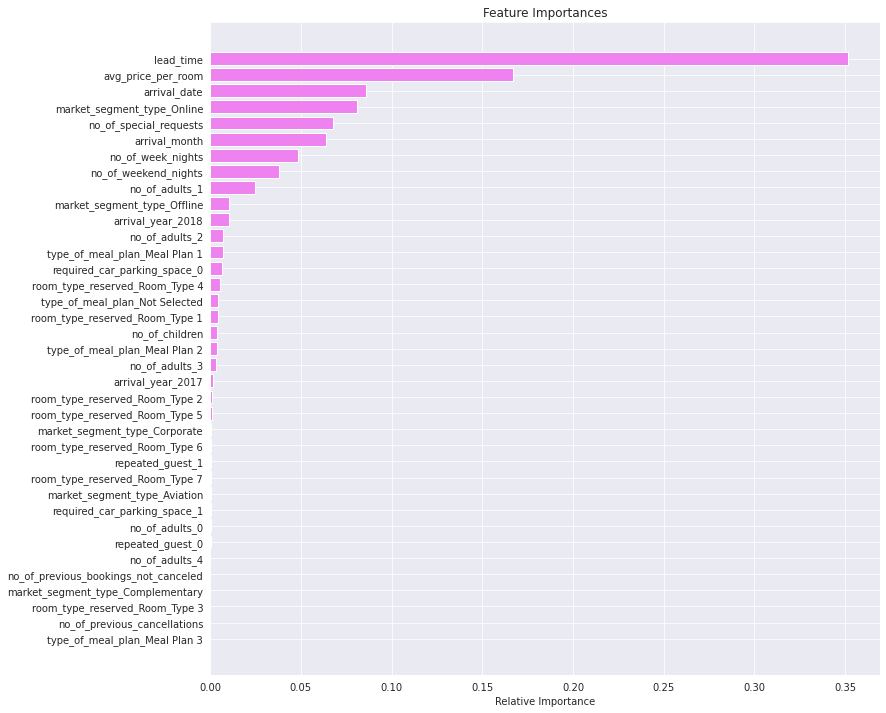

In [104]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to the decision tree model, Lead time is the most important variable for predicting if a booking will be cancelled

## Do we need to prune the tree?

The tree above is clearly complex and is prone to overfitting. We will try limiting the max_depth of the tree to 3

In [105]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train_d, y_train_d)

DecisionTreeClassifier(max_depth=3, random_state=1)

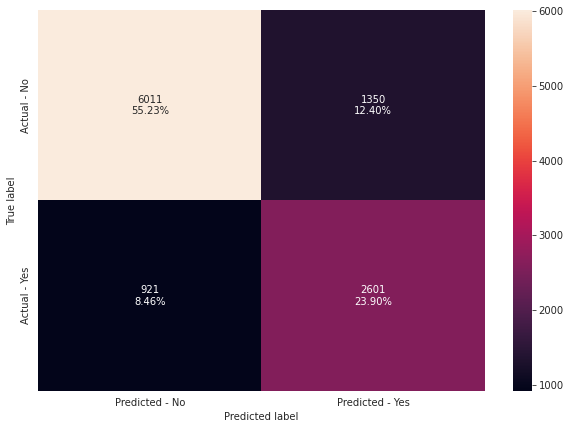

In [106]:
make_confusion_matrix_d(dTree1, y_test_d)

In [107]:
print("Accuracy on training set : ",dTree1.score(X_train_d, y_train_d))
print("Accuracy on test set : ",dTree1.score(X_test_d, y_test_d))
# Recall on train and test
get_recall_score_d(dTree1)

Accuracy on training set :  0.7844202898550725
Accuracy on test set :  0.7913259211614444
Recall on training set :  0.7315556618438359
Recall on test set :  0.7385008517887564


Recall on the training set has reduced from 0.986 to 0.732. This reduction still represents an improvement as there is currently no overfitting

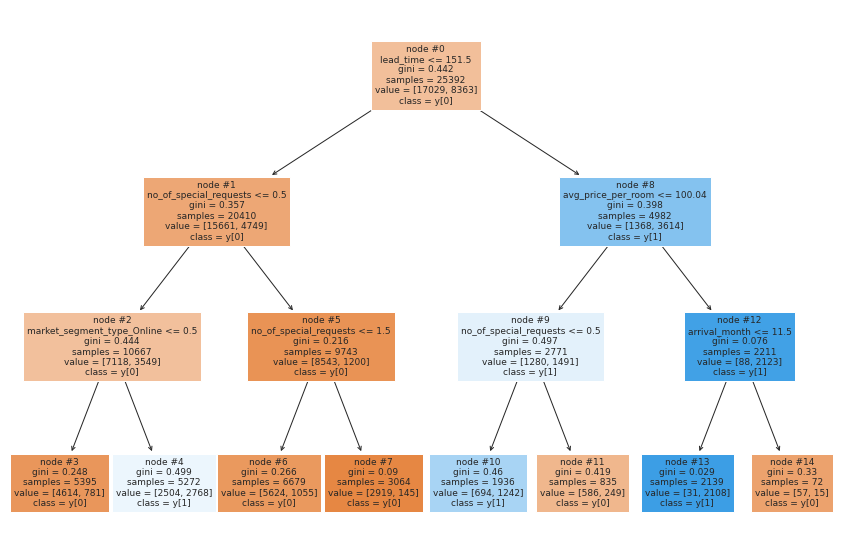

In [108]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [109]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train_d.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.501907
market_segment_type_Online            0.199054
no_of_special_requests                0.164194
avg_price_per_room                    0.113125
arrival_month                         0.021719
room_type_reserved_Room_Type 5        0.000000
type_of_meal_plan_Meal Plan 3         0.000000
type_of_meal_plan_Not Selected        0.000000
room_type_reserved_Room_Type 1        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
type_of_meal_plan_Meal Plan 1         0.000000
market_segment_type_Aviation          0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_childre

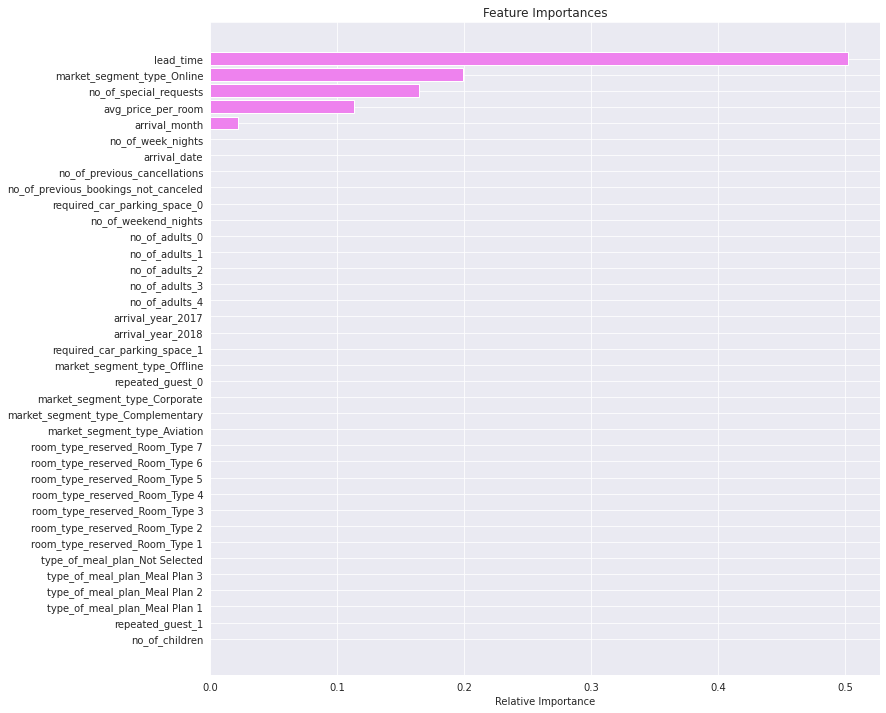

In [110]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We notice that some variables have now been left redundant. However, the Lead Time variable has increased in importance.

## Using GridSearch for Hyperparameter tunining of our tree model

## Model Performance Comparison and Conclusions

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_d, y_train_d)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 

In [113]:
estimator.fit(X_train_d, y_train_d)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

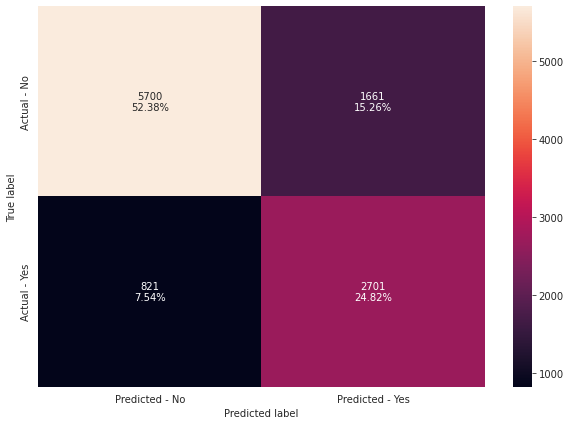

In [114]:
make_confusion_matrix_d(estimator, y_test_d)

In [115]:

print("Accuracy on training set : ",estimator.score(X_train_d, y_train_d))
print("Accuracy on test set : ",estimator.score(X_test_d, y_test_d))

get_recall_score_d(estimator)

Accuracy on training set :  0.7694943289224953
Accuracy on test set :  0.7719378847744188
Recall on training set :  0.7631232811192156
Recall on test set :  0.7668938103350369


Recall on training set has gone up from 0.73 to 0.76. The model performance has become more generalized

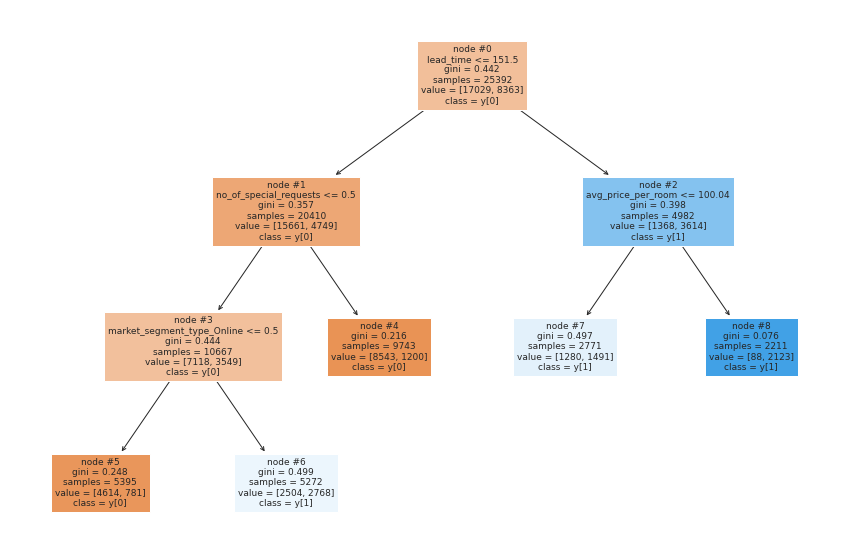

In [116]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [117]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train_d.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.539970
market_segment_type_Online            0.214150
no_of_special_requests                0.124176
avg_price_per_room                    0.121704
room_type_reserved_Room_Type 4        0.000000
type_of_meal_plan_Meal Plan 2         0.000000
type_of_meal_plan_Meal Plan 3         0.000000
type_of_meal_plan_Not Selected        0.000000
room_type_reserved_Room_Type 1        0.000000
room_type_reserved_Room_Type 2        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
repeated_guest_1                      0.000000
room_type_reserved_Room_Type 7        0.000000
market_segment_type_Aviation          0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000
type_of_meal_plan_Meal Plan 1         0.000000
no_of_childre

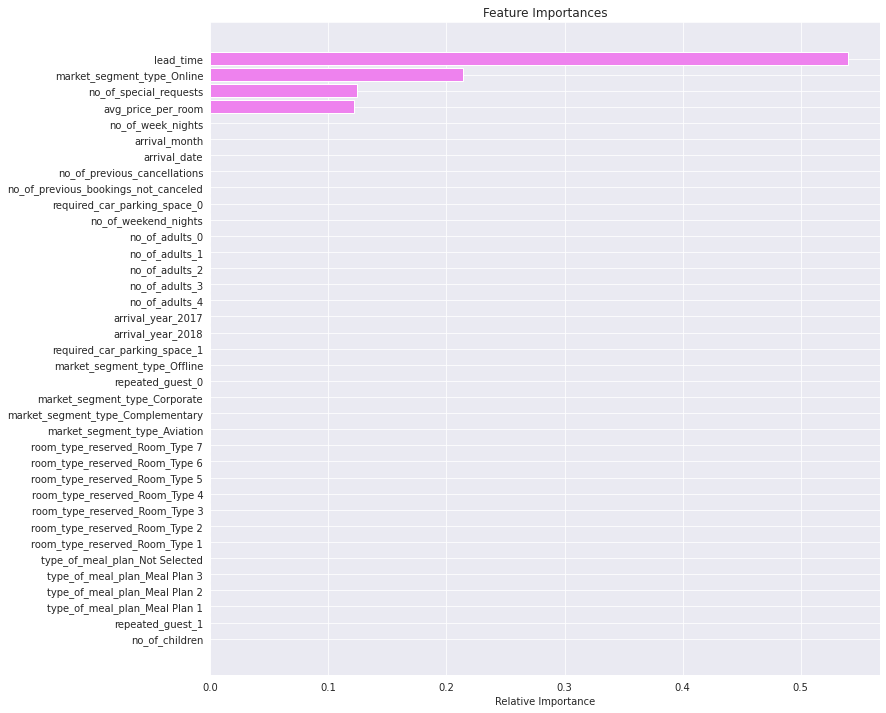

In [118]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Comparing the two models, we can see the number of week nights variable has been removed. This highlights the importance of hyperparameter tuning rather than randomly limiting it.

### We will also explore post pruning to compare the results 

In [119]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_d, y_train_d)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [120]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.007572
1     4.327745e-07    0.007573
2     4.688391e-07    0.007573
3     6.133547e-07    0.007574
4     7.772858e-07    0.007575
...            ...         ...
1352  6.747184e-03    0.286897
1353  1.304480e-02    0.299942
1354  1.725993e-02    0.317202
1355  2.399048e-02    0.365183
1356  7.657789e-02    0.441761

[1357 rows x 2 columns]

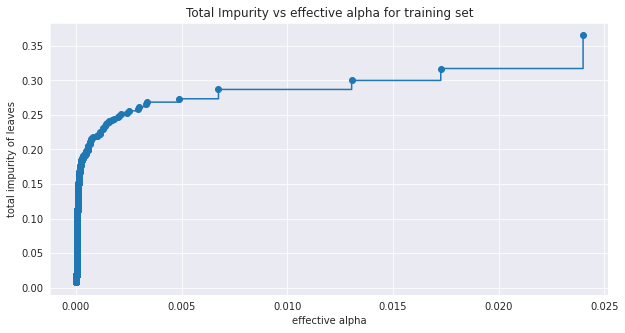

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [123]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train_d, y_train_d)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07657789477371346


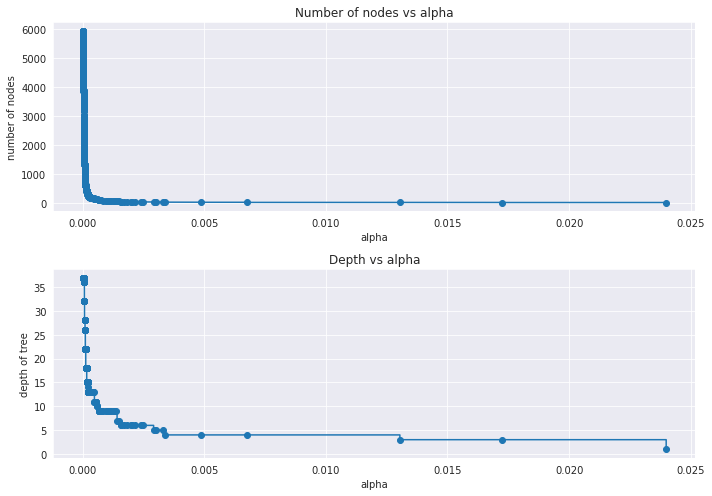

In [124]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [125]:
train_scores = [clf.score(X_train_d, y_train_d) for clf in clfs]
test_scores = [clf.score(X_test_d, y_test_d) for clf in clfs]

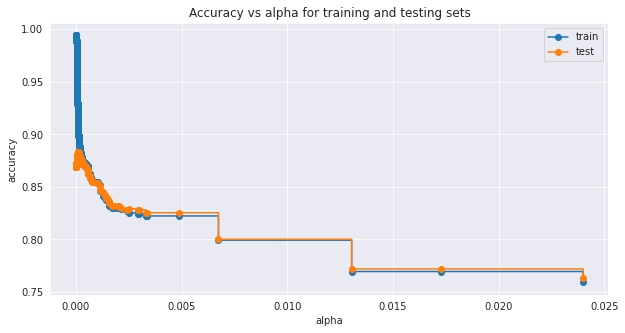

In [127]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [128]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train_d, y_train_d))
print('Test accuracy of best model: ',best_model.score(X_test_d, y_test_d))

DecisionTreeClassifier(ccp_alpha=0.00011736595788977046, random_state=1)
Training accuracy of best model:  0.9016619407687461
Test accuracy of best model:  0.8834880088210971


We have a good accuracy but for this model, we would prefer to have a better recall

In [129]:
recall_train=[]
for clf in clfs:
    pred_train_d_1=clf.predict(X_train_d)
    values_train=metrics.recall_score(y_train_d,pred_train_d_1)
    recall_train.append(values_train)

In [130]:
recall_test=[]
for clf in clfs:
    pred_test_d_1=clf.predict(X_test_d)
    values_test=metrics.recall_score(y_test_d,pred_test_d_1)
    recall_test.append(values_test)

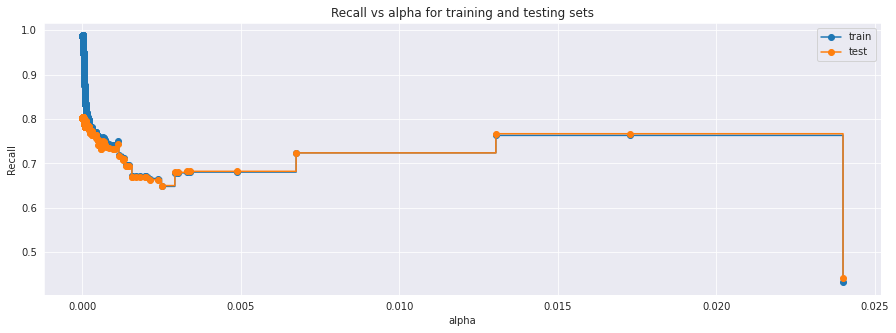

In [131]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [132]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=2.5061579881995774e-05, random_state=1)


We check in on the confusion matrix for the post-pruned decision tree

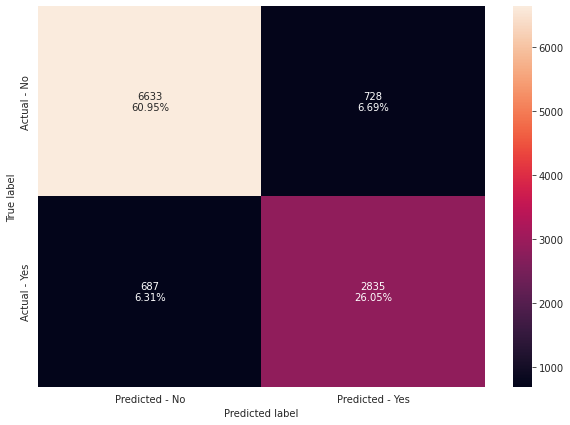

In [133]:
make_confusion_matrix_d(best_model, y_test_d)

In [134]:
get_recall_score_d(best_model)

Recall on training set :  0.9860098050938658
Recall on test set :  0.8049403747870528


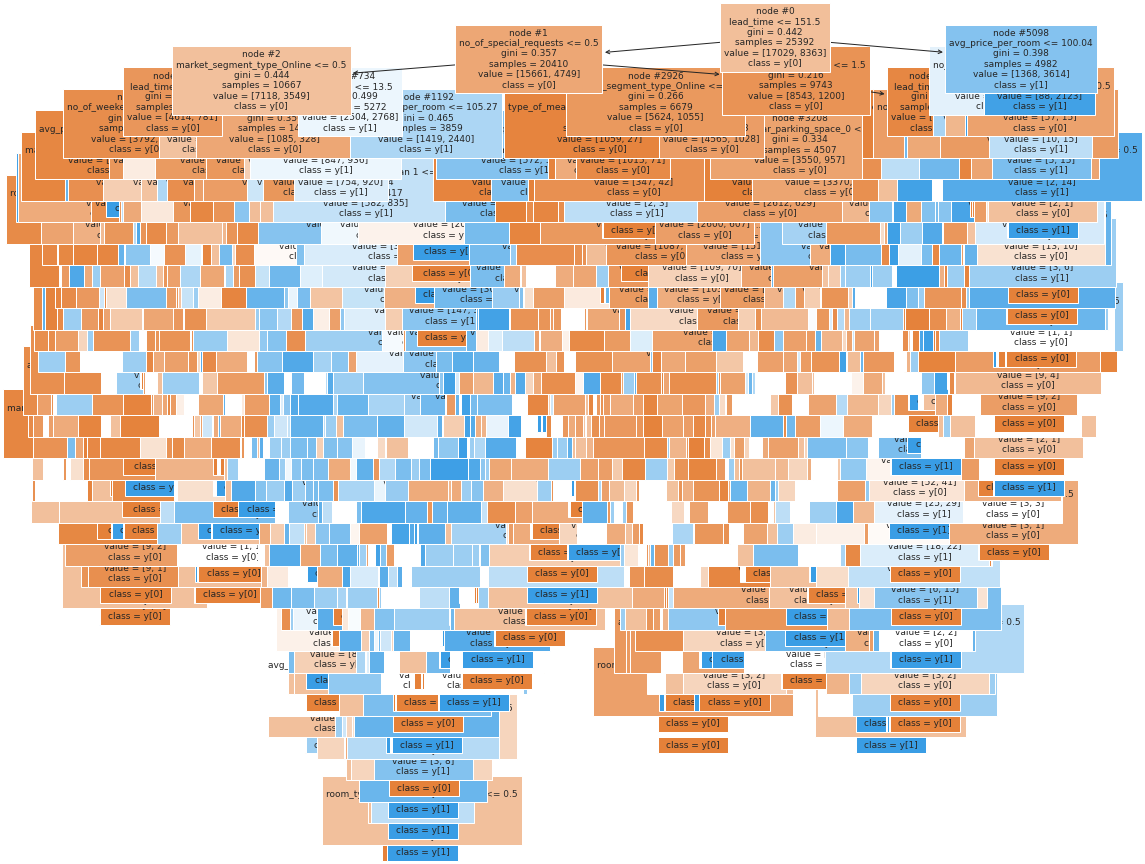

In [135]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

The decision tree generated through the cost complexity model seems very detailed and may have a bit of overfitting 

In [136]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train_d.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.352268
avg_price_per_room                    0.166553
arrival_date                          0.085314
market_segment_type_Online            0.081412
no_of_special_requests                0.068135
arrival_month                         0.063551
no_of_week_nights                     0.048375
no_of_weekend_nights                  0.037854
no_of_adults_1                        0.024835
market_segment_type_Offline           0.010274
arrival_year_2018                     0.010164
no_of_adults_2                        0.006985
type_of_meal_plan_Meal Plan 1         0.006812
required_car_parking_space_0          0.006634
room_type_reserved_Room_Type 4        0.005245
type_of_meal_plan_Not Selected        0.004609
room_type_reserved_Room_Type 1        0.004097
no_of_children                        0.003965
type_of_meal_plan_Meal Plan 2         0.003645
no_of_adults_3                        0.003041
room_type_res

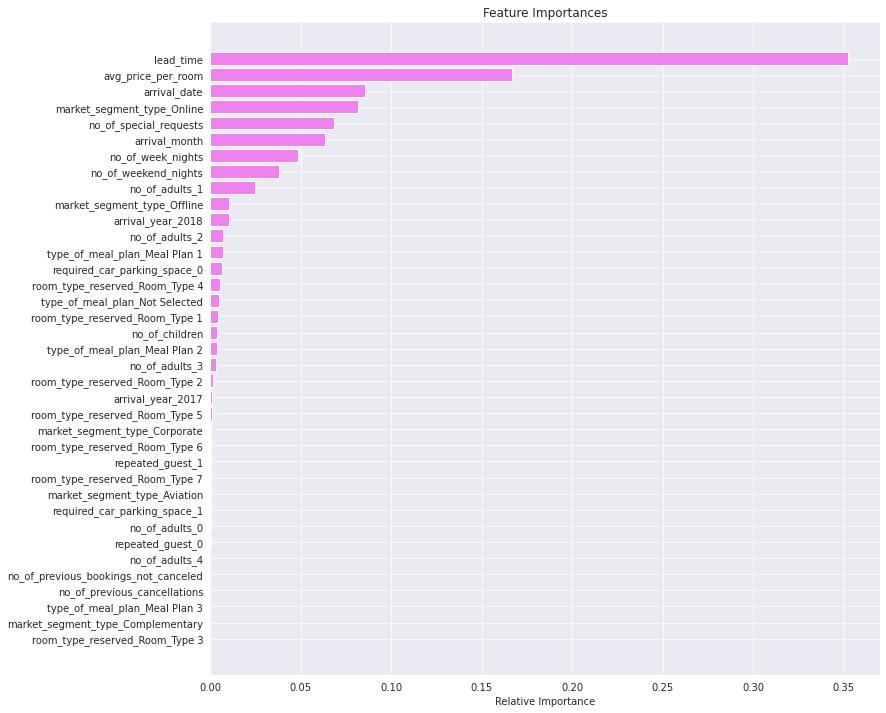

In [137]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [138]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision tree with restricted maximum depth','Decision treee with hyperparameter tuning',
                                         'Decision tree with post-pruning'], 'Train_Recall':[0.99,0.73,0.76,0.99], 'Test_Recall':[0.80,0.74,0.77,0.80]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                  Initial decision tree model          0.99         0.80
1  Decision tree with restricted maximum depth          0.73         0.74
2    Decision treee with hyperparameter tuning          0.76         0.77
3              Decision tree with post-pruning          0.99         0.80

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

## Insights



1.   The decision tree with the post-pruning shows the highest recall on the test set at 0.80 and should be used for the predictions
2.   The online market segment is a major segment to focus upon in terms of driving profitability



## Recommendations


*   The hotel should consider exploring more factors and running more tests to ensure a proper understanding of the relationships and what reduces the % of false negatives
*   The use of a CRM system could also be useful in other areas
*   Regarding the lead time, the hotel could setup a system where there are follow up calls with the customers to keep track of their booking status and general feeling leading up to the date
*   They could also institute a deposit on booking which could reduce the cancellation rate



